In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [5]:
from google.colab import files
import zipfile
import os

# آپلود فایل زیپ
uploaded = files.upload()

# اسم فایل زیپ (مثلاً photos.zip)
zip_path = "assets.zip"

# باز کردن و استخراج
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("images")  # همه عکس‌ها داخل پوشه images ریخته می‌شوند

# بررسی محتوا
os.listdir("images")


Saving assets.zip to assets.zip


['lenna.png',
 'noise-fingerprint.png',
 'niagara.jpg',
 'bacteria.jpg',
 'tiger.jpg',
 'connected-circles.png',
 'tower-bridge.jpg',
 'bird.jpg',
 'cameraman.png']

# Sharpening using smooth filters




> We've seen that smooth filters are used to blur and remove info from the image.
<br>
In this part your task is to do the opposite ! Use them to actually make the image sharper



- hint: $$
g_{\text{sharp}} = f + \gamma \left( f - h_{\text{blur}} * f \right)
$$


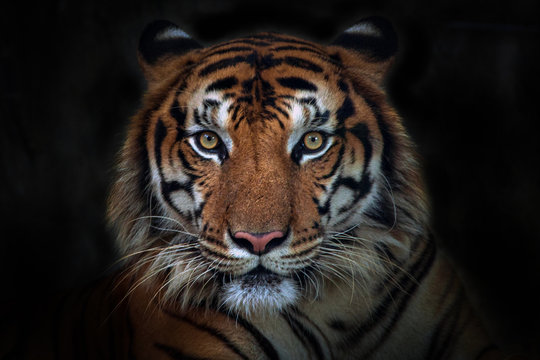

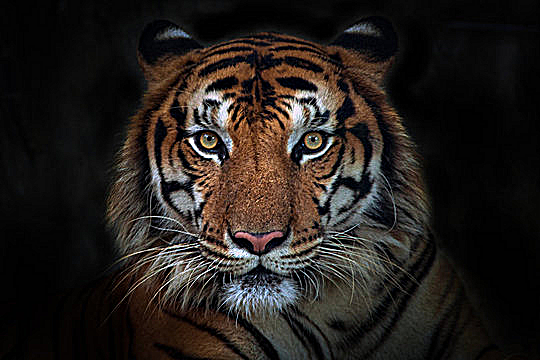

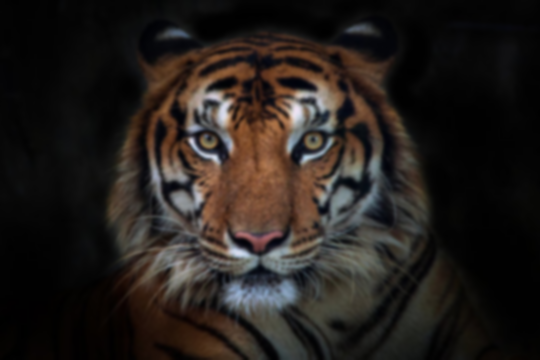

In [15]:

def sharpen_image(image, kernel_size=(7, 7), gamma=2):
  img_float = image.astype(np.float32)
  # TODO: Apply a smoothing filter (e.g., Gaussian blur)
  blur = cv2.GaussianBlur(img_float, kernel_size, 0)

  # TODO: Calculate the difference between the original and blurred image
  detail = img_float - blur

  # TODO: Apply the gamma factor
  detail_ = gamma * detail
  # TODO:
  # Add the sharpened detail back to the original image
  sharpened = img_float + detail_
  # Convert sharpened_detail to the same data type as the original image
  # return the sharp image and the blur one
  sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
  blur = np.clip(blur, 0, 255).astype(np.uint8)
  return sharpened ,blur



image = cv2.imread('images/tiger.jpg')
if image is not None:
  sharpened_img, blur = sharpen_image(image)
  cv2_imshow(image)
  cv2_imshow(sharpened_img)
  cv2_imshow(blur)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
else:
  print("Error: Could not load image.")

# Morphological Edge Detection

- Extract clean object boundaries by subtracting eroded image from its dilated version


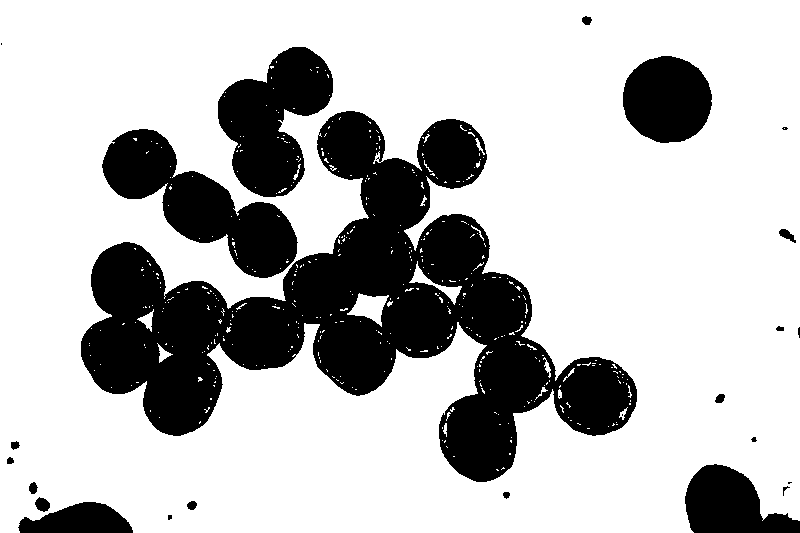

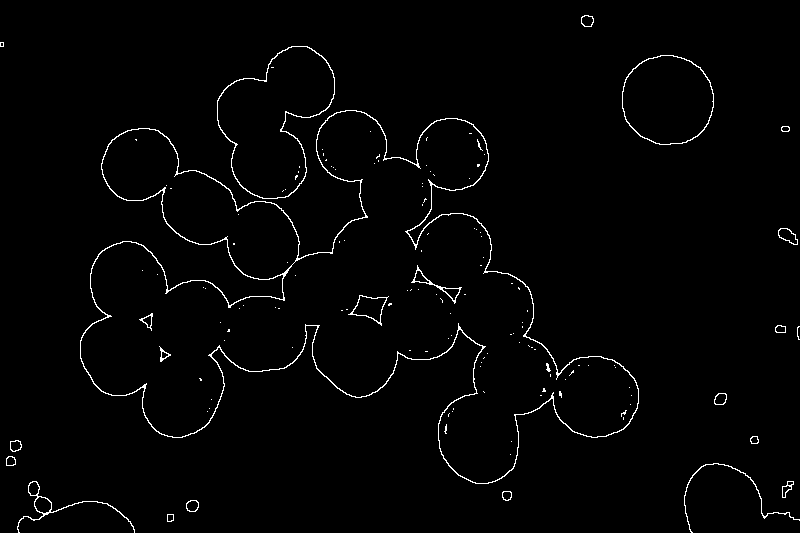

In [36]:
# Read the image
img = cv2.imread("images/bacteria.jpg", cv2.IMREAD_GRAYSCALE)
# For black and white image:
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# TODO: Morphological edge detection (dilate and then erode and then ...)
# structuring element a 5 x 5 square
kernel = np.ones((5, 5), np.uint8)
kernel2 = np.ones((2, 2), np.uint8)
# erosion
eroded_img = cv2.erode(binary, kernel, iterations=1)

# TODO: clean edges with morphological closing
edges = cv2.subtract(binary, eroded_img)
edges_eroded = cv2.erode(edges, kernel2, iterations=1)
# TODO: Show results
cv2_imshow(binary)
cv2_imshow(edges_eroded)

# Count bacteria



> Add blockquote



bonus:
- find a way to calculate the kernel size automatically (based on overlaps or cell sizes for example)
- reconstruct cells by dilation after counting them

Number of components (excluding background): 26


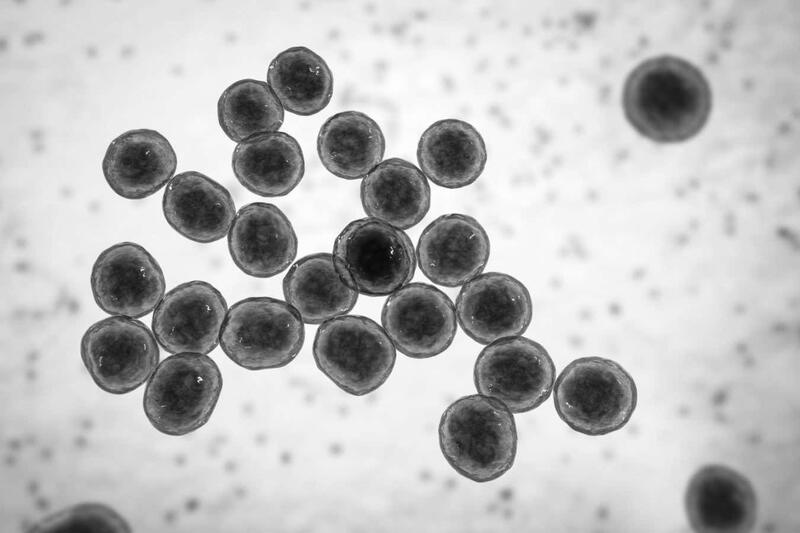

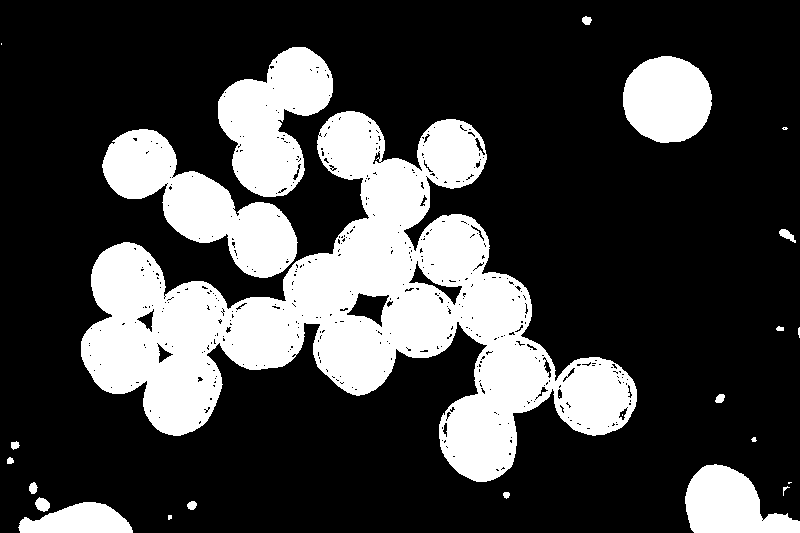

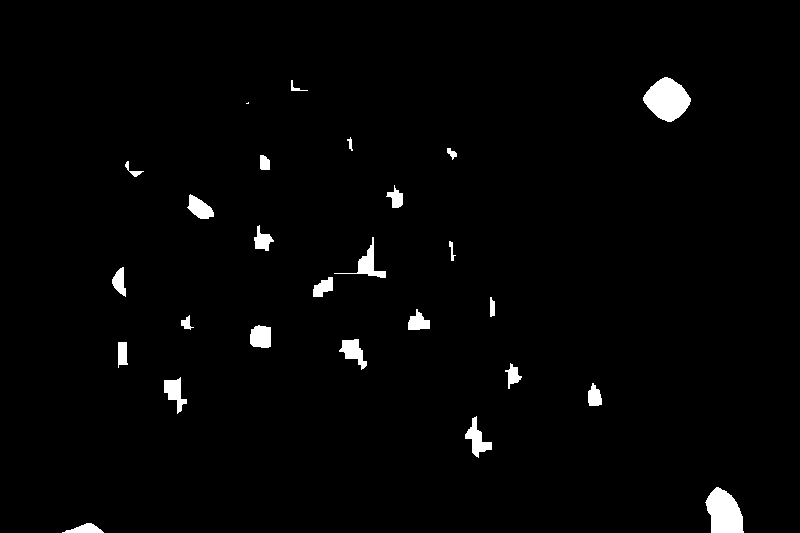

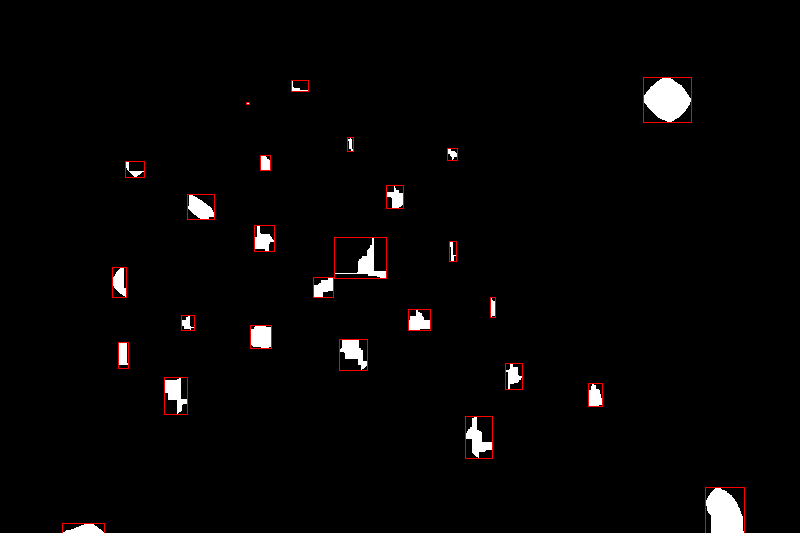

In [59]:
# Load image (grayscale)
img = cv2.imread("images/bacteria.jpg", cv2.IMREAD_GRAYSCALE)

# Otsu thresholding
# For black and white image:
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Flip the colors (for morphology)
binary = cv2.bitwise_not(binary)

# TODO: Erosion to remove small noise
kernel = np.ones((35 , 35), np.uint8)
eroded = cv2.erode(binary, kernel, iterations=1)
out = cv2.cvtColor(eroded.copy(), cv2.COLOR_GRAY2BGR)
# TODO: Connected component analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(eroded)
# TODO: print the number of components
print("Number of components (excluding background):", num_labels - 1)
# TODO: Draw results (Boxes)
for i in range(1, num_labels):  # i=0 پس‌زمینه است
    x, y, w, h, area = stats[i]
    cv2.rectangle(out, (x, y), (x+w, y+h), (0, 0, 255), 1)
# TODO: Display
cv2_imshow(img)
cv2_imshow(binary)
cv2_imshow(eroded)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Optional



> Learn as much as you want about CNNs and ask mentors (CNNs will be taught in future sessions)



# Sources:
- Computer Vision: Algorithms and Applications
- Dr. Karimi videos
- Google
- My own knowledge